**Signal Processing**

Used To Enhance,Clean Or Isolate Specific Components Of A Signal By Removing Unwanted Noise Or Frequencies.

**Signal Flitering Techniques**

1. Butterworth Low Pass Filter



*   Removes High Frequency Noise By Allowing Frequencies Below The Cutoff (100 Hz) To Pass Smoothing The Signal.

*   A Noisy Signal Is Created By Combining Sinusoids And Random Noise And A Butterworth Low Pass Filter Removes Frequencies Above 100 Hz Using Zero Phase Filtering Then The Original And Filtered Signals Are Plotted For Comparison.



In [20]:
import numpy as np, matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt,medfilt,savgol_filter

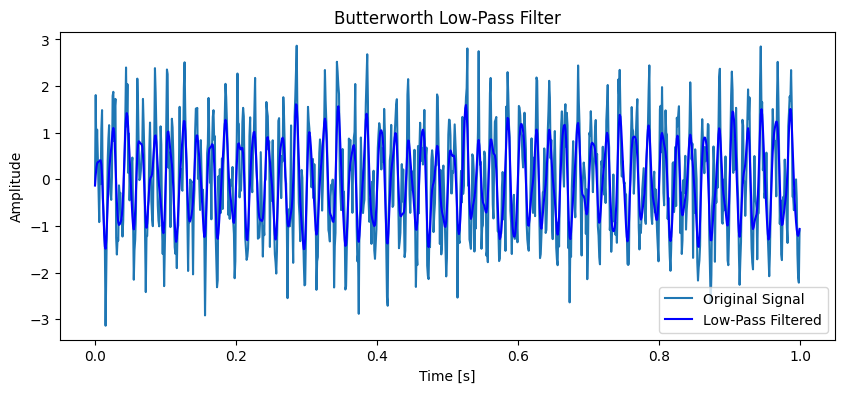

In [21]:
fs=1000
t=np.linspace(0,1,fs,endpoint=False)
signal=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)+0.5*np.random.randn(fs)

def butter_low(data,cutoff,fs,order=4):
  nyq=0.5*fs
  normal=cutoff/nyq
  b,a=butter(order,normal,btype='low')
  return filtfilt(b,a,data)

cutoff=100
filtered=butter_low(signal,cutoff,fs)
#Plotting
plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='Low-Pass Filtered',color='blue')
plt.title('Butterworth Low-Pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

2. Butterworth High Pass Filter



*   Removes Low Frequency Components Below The Cutoff (100 Hz) Highlighting Higher Frequency Detail.

*   Applied To Remove Frequencies Below 100 Hz From The Signal. The filtfilt Function Ensures Zero Phase Distortion During Flitering. The Filtered Signal Is Plotted Alongside The Original To Show The High Frequency Components Retained.



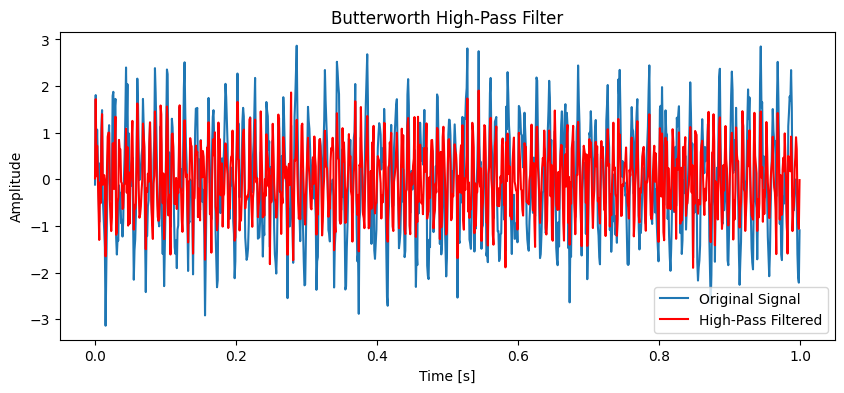

In [22]:
from numpy.random.mtrand import normal
def butter_high(data,cutoff,fs,order=4):
  nyq=0.5*fs
  normal=cutoff/nyq
  b,a=butter(order,normal,btype='high')
  return filtfilt(b,a,data)

cutoff=100
filtered=butter_high(signal,cutoff,fs)
#Plotting
plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='High-Pass Filtered',color='red')
plt.title('Butterworth High-Pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

3. Butterworth Band Pass Filter

*   Passes Frequencies Within A Specified Range Filtering Out Frequencies Outside This Band.
*   A Butterworth Band Pass Filter Passes Frequencies Between 40 Hz And 130 Hz Removing Components Outside This Range. The filtfilt Function Ensures Zero Phase Distortion. The Plot Shows The Original And Band Filtered Signal For Comparison.



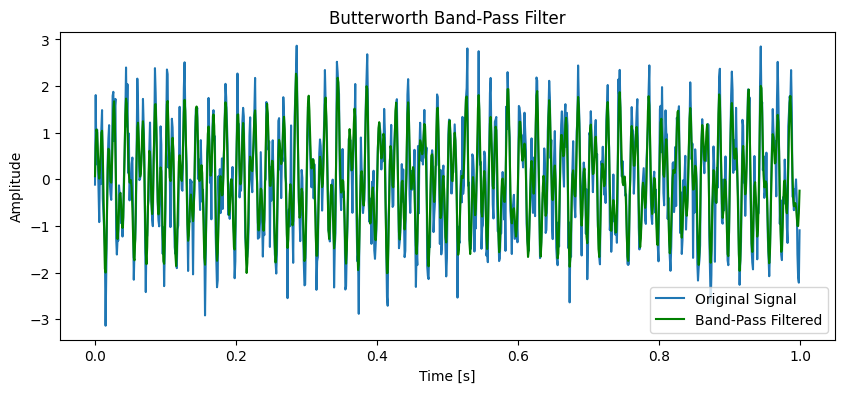

In [23]:
def butterworth_bandpass(data,lowcut,highcut,fs,order=4):
  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq
  b,a=butter(order,[low,high],btype='band')
  return filtfilt(b,a,data)

lowcut=40
highcut=130
filtered=butterworth_bandpass(signal,lowcut,highcut,fs)
#Plotting
plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='Band-Pass Filtered',color='green')
plt.title('Butterworth Band-Pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

4. Butterworth Band Stop Filter



*   Removes Frequencies Within A Narrow Band Often Used To Eliminate Specific Noise Like Powerline Interference.

*   A Butterworth Band Stop (Notch) Filter Removes Frequencies Between 55 Hz And 65 Hz From The Signal. The filtfilt Function Applies The Filter With Zero Phase Distortion. The Plot Compares The Original And Notch Filtered Signals.



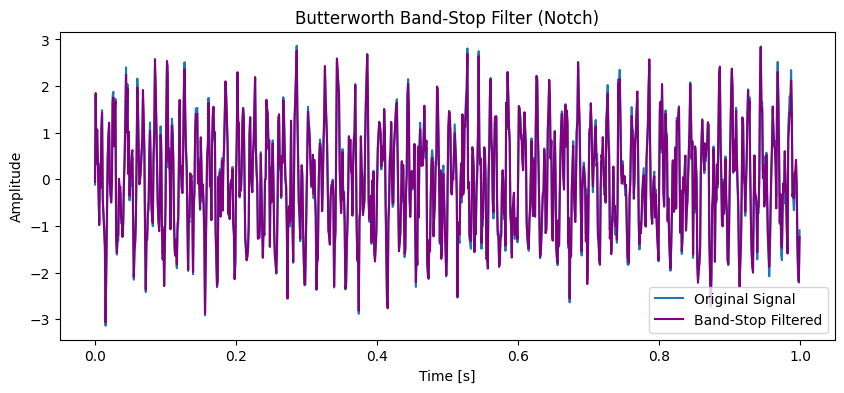

In [24]:
def buttweworth_notch(data,lowcut,highcut,fs,order=4):
  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq
  b,a=butter(order,[low,high],btype='bandstop')
  return filtfilt(b,a,data)

lowcut,highcut=55,65
filtered=buttweworth_notch(signal,lowcut,highcut,fs)
#Plotting
plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='Band-Stop Filtered',color='purple')
plt.title('Butterworth Band-Stop Filter (Notch)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

5. Median Filter



*   Reduces Impulsive Noise By Replacing Each Point With The Median Of Neighbouring Values,Preserving Edges Better Than Linear Filters.

*   A Median Filter With A Kernel Size Of 5 Is Applied To The Signal To Reduce Noise Especially Impulsive Noise.It Replaces Each Point With The Median Of Neighbouring Values Preserving Edges Better Than Linear Filters.The Plot Shows The Original And Median Filtered Signal For Comparsion.



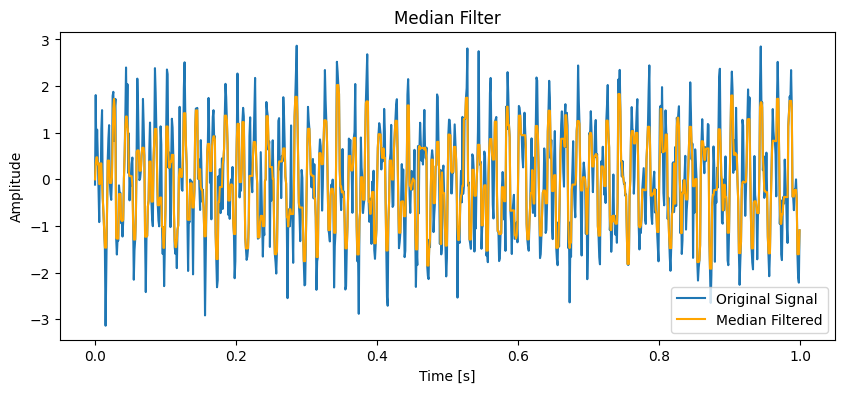

In [25]:
kernel=5
filtered=medfilt(signal,kernel_size=kernel)

plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='Median Filtered',color='orange')
plt.title('Median Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

6. Savitzky Golay Filter



*   Smooths The Signal By Fitting Polynomials Within A Moving Window,Preserving Singal Features Likes Peaks While Reducing Noise.

*   The Savitzky Golay Fiter Smooths The Signal Using Polynomial Fit Withing A Moving Window Of Length 11 And Polynomial Of Order 3.This Preserves Features Like Peaks While Reducing Noise. The Plot Compares The Original And Smoothed Signals.



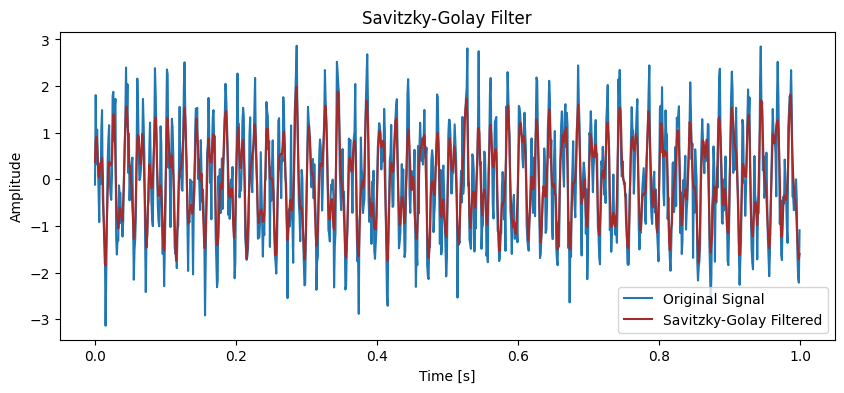

In [26]:
window,polyord=11,3
filtered=savgol_filter(signal,window_length=window,polyorder=polyord)
plt.figure(figsize=(10,4))
plt.plot(t,signal,label='Original Signal')
plt.plot(t,filtered,label='Savitzky-Golay Filtered',color='brown')
plt.title('Savitzky-Golay Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()